# A Look at Interruption
How many characters are interrupted? How often are they women?

In [1]:
import pandas as pd

In [2]:
movies_df = pd.read_pickle(r"C:/Users/cassi/Desktop/Data_Science/Animated-Movie-Gendered-Dialogue/private/all_tagged_dialogue.pkl")

In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13442 entries, 0 to 14095
Data columns (total 16 columns):
Disney_Period       13442 non-null object
Gender              13442 non-null object
Movie               13442 non-null object
Role                13442 non-null object
Song                13442 non-null object
Speaker             13442 non-null object
Speaker_Status      13442 non-null object
Text                13442 non-null object
UTTERANCE_NUMBER    13442 non-null int64
Year                13442 non-null int64
Tokens              13442 non-null object
Types               13442 non-null object
Token_Count         13442 non-null int64
Type_Count          13442 non-null int64
POS                 13442 non-null object
Tag_Freq            13442 non-null object
dtypes: int64(4), object(12)
memory usage: 1.1+ MB


In [41]:
def is_interrupted(line):
    if line.endswith('-'):
        return 'Yes'
    else:
        return 'No'

In [42]:
movies_df['Interrupted'] = movies_df.Text.map(is_interrupted)

In [43]:
movies_df.info() #152 interruptions!

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13442 entries, 0 to 14095
Data columns (total 17 columns):
Disney_Period       13442 non-null object
Gender              13442 non-null object
Movie               13442 non-null object
Role                13442 non-null object
Song                13442 non-null object
Speaker             13442 non-null object
Speaker_Status      13442 non-null object
Text                13442 non-null object
UTTERANCE_NUMBER    13442 non-null int64
Year                13442 non-null int64
Tokens              13442 non-null object
Types               13442 non-null object
Token_Count         13442 non-null int64
Type_Count          13442 non-null int64
POS                 13442 non-null object
Tag_Freq            13442 non-null object
Interrupted         13442 non-null object
dtypes: int64(4), object(13)
memory usage: 1.7+ MB


In [44]:
movies_df.groupby('Gender')['Interrupted'].describe()

,count,unique,top,freq
Gender,,,,
f,4216,2,No,4179
m,8914,2,No,8803
n,312,2,No,308


Questions:
* What percentage of speakers is this?
* Among each gender, what's the gender of the next speaker?

In [45]:
movies_df[movies_df['Interrupted'] == 'Yes'].Movie.unique()

array(['Moana', 'Antz', 'Shrek', 'Shrek 3', 'Kung Fu Panda',
       'How to Train Your Dragon', 'Rise of the Guardians', 'The Croods',
       'How to Train Your Dragon 2'], dtype=object)

It turns out...the only movies with "interruptions" are Dreamworks Movies and the one Disney movie I annotated! So, not a stat I can investigate...at least not for now.

In [46]:
#Lets analyze for shits and giggles.
inter_movies_df = movies_df.loc[movies_df['Movie'].isin(['Moana', 'Antz', 'Shrek', 'Shrek 3', 'Kung Fu Panda', 
                                                        'How to Train Your Dragon', 'Rise of the Guardians', 'The Croods',
                                                        'How to Train Your Dragon 2'])]

In [47]:
inter_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6394 entries, 5606 to 14095
Data columns (total 17 columns):
Disney_Period       6394 non-null object
Gender              6394 non-null object
Movie               6394 non-null object
Role                6394 non-null object
Song                6394 non-null object
Speaker             6394 non-null object
Speaker_Status      6394 non-null object
Text                6394 non-null object
UTTERANCE_NUMBER    6394 non-null int64
Year                6394 non-null int64
Tokens              6394 non-null object
Types               6394 non-null object
Token_Count         6394 non-null int64
Type_Count          6394 non-null int64
POS                 6394 non-null object
Tag_Freq            6394 non-null object
Interrupted         6394 non-null object
dtypes: int64(4), object(13)
memory usage: 574.5+ KB


In [48]:
inter_movies_df.groupby('Gender')['Interrupted'].describe()

,count,unique,top,freq
Gender,,,,
f,1382,2,No,1345
m,4788,2,No,4677
n,224,2,No,220


In [49]:
inter_movies_df.groupby('Role')['Interrupted'].describe() #protagonists interrupted the most

,count,unique,top,freq
Role,,,,
ANT,849,2,No,836
HELPER,1926,2,No,1894
N,903,2,No,889
PRO,2716,2,No,2623


In [50]:
inter_movies_df.groupby(['Gender', 'Role'])['Interrupted'].describe()

count unique top  freq
Gender Role                         
f      ANT       15      1  No    15
       HELPER   474      2  No   468
       N        139      2  No   137
       PRO      754      2  No   725
m      ANT      833      2  No   820
       HELPER  1445      2  No  1419
       N        549      2  No   541
       PRO     1961      2  No  1897
n      ANT        1      1  No     1
       HELPER     7      1  No     7
       N        215      2  No   211
       PRO        1      1  No     1

In [51]:
inter_movies_df.Gender.value_counts()

m    4788
f    1382
n     224
Name: Gender, dtype: int64

In [52]:
inter_movies_df[inter_movies_df.Interrupted == 'Yes'].Gender.value_counts()

m    111
f     37
n      4
Name: Gender, dtype: int64

In [65]:
inter_movies_df = inter_movies_df[inter_movies_df.Gender != 'n']

In [69]:
x = inter_movies_df[inter_movies_df.Interrupted == 'Yes'].Gender.value_counts()
y = inter_movies_df.Gender.value_counts()
avg_inter_by_gen = (x/y)*100
avg_inter_by_gen

m    2.318296
f    2.677279
Name: Gender, dtype: float64

In [71]:
from matplotlib import pyplot as plt

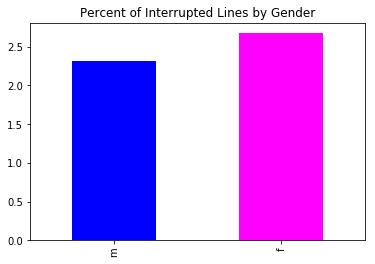

In [83]:
avg_inter_by_gen.plot(kind='bar', color = ['blue', 'magenta'])
plt.title('Percent of Interrupted Lines by Gender')
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\inter_gen.png")

In [53]:
#Is this statistically significant?

In [38]:
from scipy import stats

In [58]:
stats.zscore(avg_inter_by_gen)

array([ 0.15798606,  1.13808556, -1.29607163])

In [ ]:
#What does this mean? 
#though interruptions in women is slightly above the average, it's not significant...
#Am I using these tests correctly?

In [75]:
inter_movies_df = inter_movies_df[inter_movies_df.Role != 'N']

In [76]:
x = inter_movies_df[inter_movies_df.Interrupted == 'Yes'].Role.value_counts()
y = inter_movies_df.Role.value_counts()
avg_inter_by_role = (x/y)*100
avg_inter_by_role

PRO       3.425414
HELPER    1.667535
ANT       1.533019
Name: Role, dtype: float64

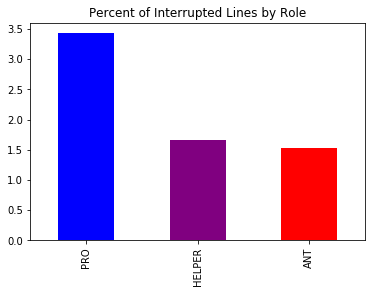

In [84]:
avg_inter_by_role.plot(kind='bar', color = ['blue', 'purple', 'red'])
plt.title('Percent of Interrupted Lines by Role')
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\inter_role.png")

In [80]:
x = inter_movies_df[inter_movies_df.Interrupted == 'Yes'].groupby('Gender')['Role'].value_counts()
y = inter_movies_df.groupby('Gender')['Role'].value_counts()
avg_inter_by_role_gen = (x/y)*100
avg_inter_by_role_gen

Gender  Role  
f       ANT            NaN
        HELPER    1.265823
        PRO       3.846154
m       ANT       1.560624
        HELPER    1.799308
        PRO       3.263641
Name: Role, dtype: float64

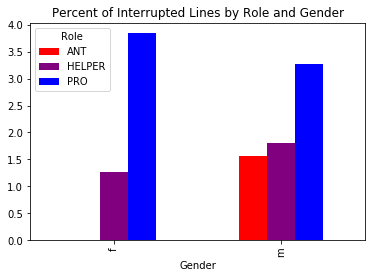

In [85]:
avg_inter_by_role_gen.unstack().plot(kind='bar', color=['red', 'purple', 'blue'])
#no female antagonists are interrupted!!!
#this could be due the fact that Dreamworks does a better job at marking interruption....
#and also Dreamworks doesn't have female villains
plt.title('Percent of Interrupted Lines by Role and Gender')
plt.savefig(r"C:\Users\cassi\Desktop\Data_Science\Animated-Movie-Gendered-Dialogue\images\inter_gen_role.png")